In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
cars = pd.read_csv("/Users/chira/Downloads/cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars.corr()


,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [6]:
# Split the dataset into dependant and indepandant variables

y = cars.loc[:,'MPG']
x = cars.loc[:,cars.columns!='MPG']
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


# Scatterplot between variables along the histogram

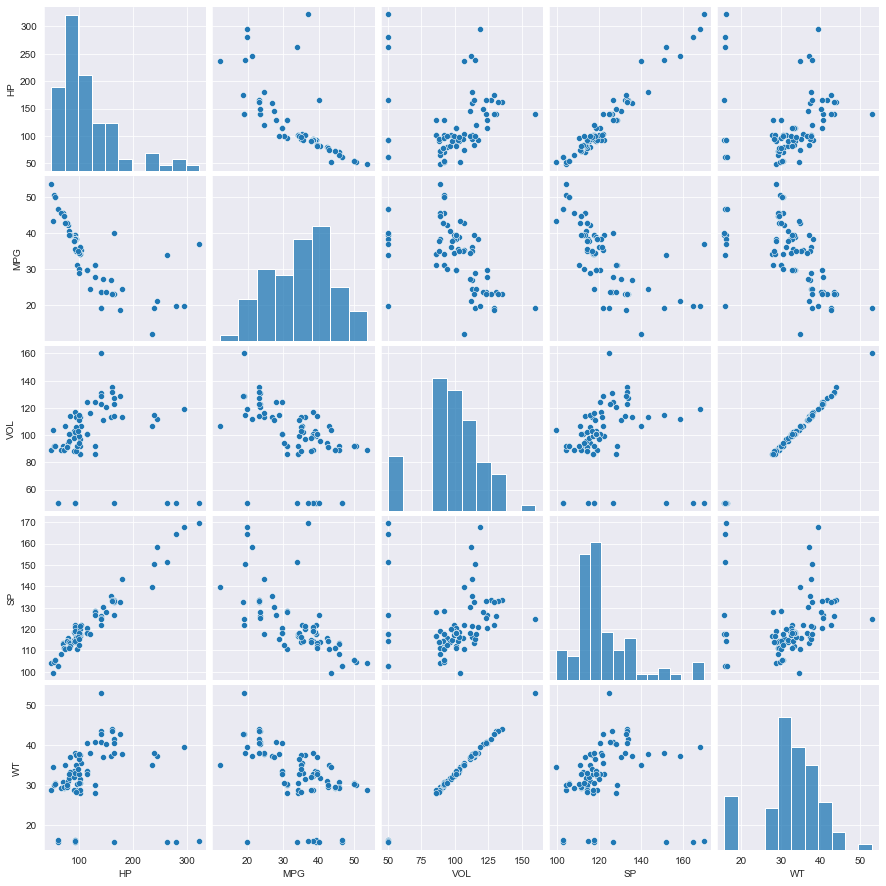

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

## Preparing a Model

In [8]:
# Building a model

import statsmodels.formula.api as smf

model= smf.ols('MPG~HP+SP+WT+VOL',data=cars).fit()

In [9]:
model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
WT            0.400574
VOL          -0.336051
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
HP          -5.238735
SP           2.499880
WT           0.236541
VOL         -0.590970
dtype: float64 
 Intercept    0.042936
HP           0.000001
SP           0.014579
WT           0.813649
VOL          0.556294
dtype: float64


In [11]:
#R squared vlaues
model.rsquared

0.7705372737359844

## Simple Linear Regression Models

In [12]:
ml_v = smf.ols('MPG~VOL',data=cars).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [13]:
ml_w = smf.ols('MPG~WT',data=cars).fit()
print(ml_w.tvalues,'\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [14]:
ml_wv = smf.ols('MPG~VOL+WT',data=cars).fit()
print(ml_wv.tvalues,'\n',ml_wv.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 
 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


# Calculating the VIF

In [15]:
rsq_hp = smf.ols('HP~WT+SP+VOL',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

19.92658897499852

In [16]:
rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)
vif_vol

638.8060836592878

In [17]:
rsq_sp = smf.ols('SP~WT+HP+VOL',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)
vif_sp

20.00763878305008

In [18]:
rsq_wt = smf.ols('WT~HP+SP+VOL',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)
vif_wt

639.5338175572624

In [19]:
# Storing VIF values in the Dataframe 

d1 = {'Variables':['HP','WT','SP','VOL'],'VIF':[vif_hp,vif_sp,vif_wt,vif_vol]}

vif_frame = pd.DataFrame(d1)

vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,20.007639
2,SP,639.533818
3,VOL,638.806084


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

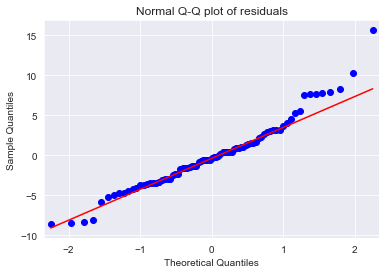

In [20]:
import statsmodels.api as sm

qqplot  = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid<-5))

[array([11, 17, 25, 48, 58, 70], dtype=int64)]

## Residual Plot For Homoscedasticity

In [22]:
def get_standardized_values(vals) :
    return (vals - vals.mean())/vals.std()

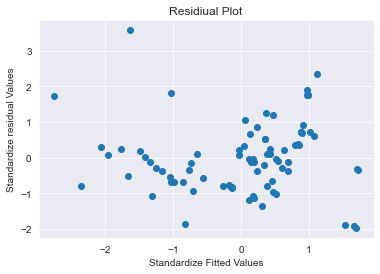

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residiual Plot')
plt.xlabel('Standardize Fitted Values')
plt.ylabel('Standardize residual Values')

plt.show()

## Residual vs Regressors

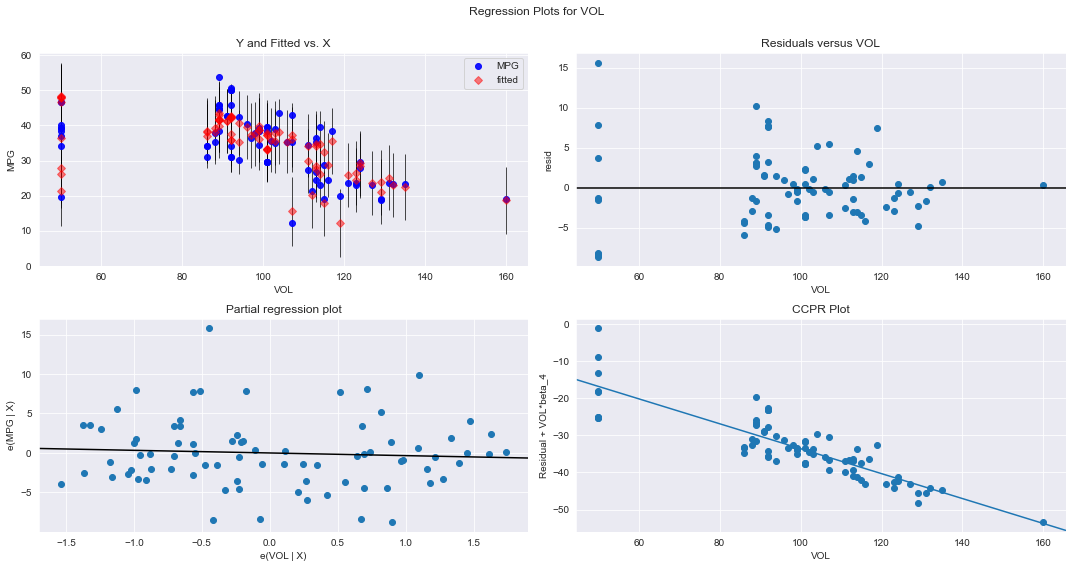

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"VOL",fig=fig)

plt.show()

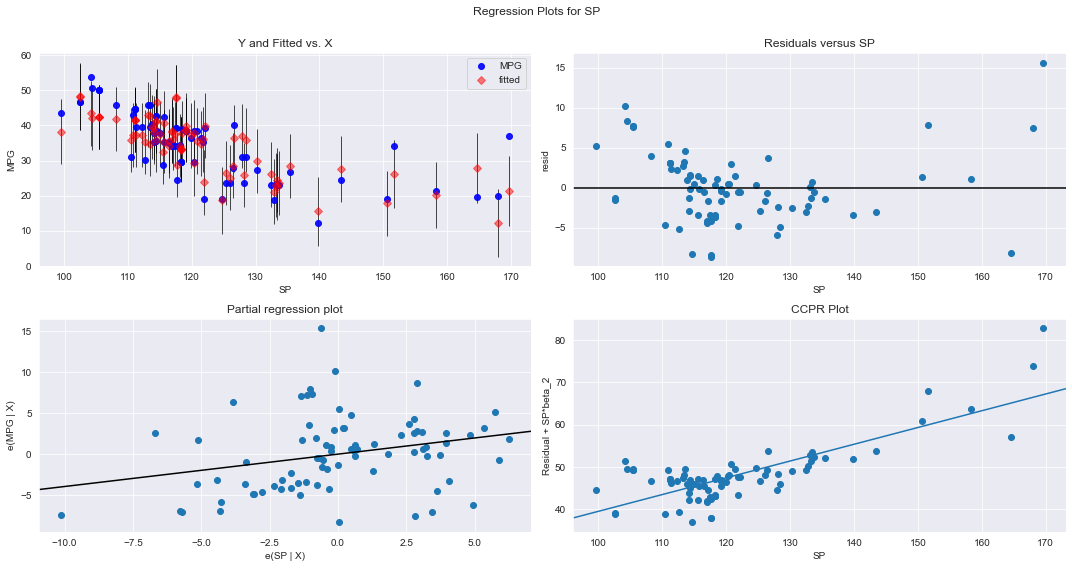

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

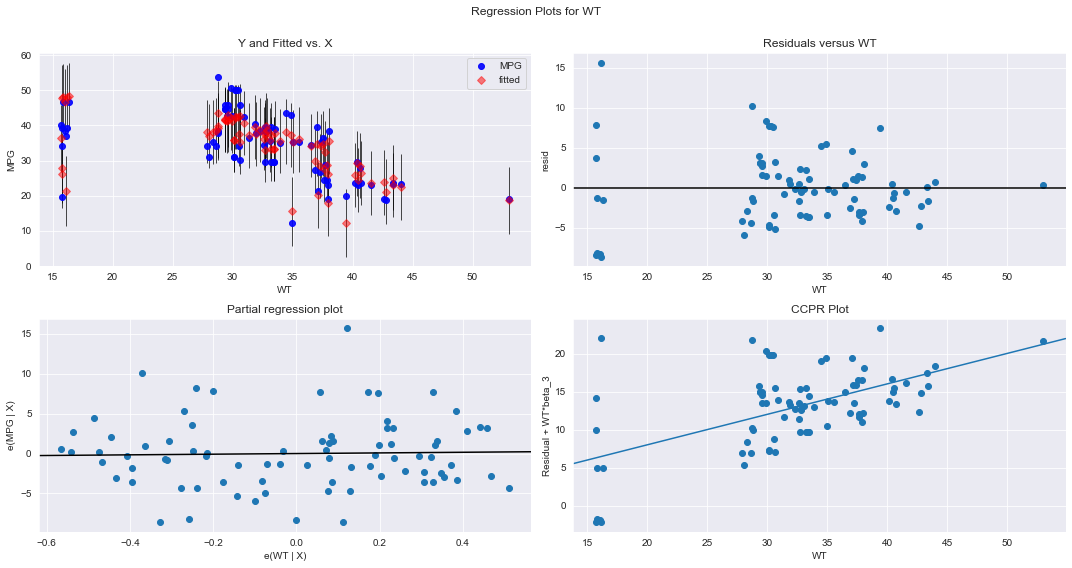

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

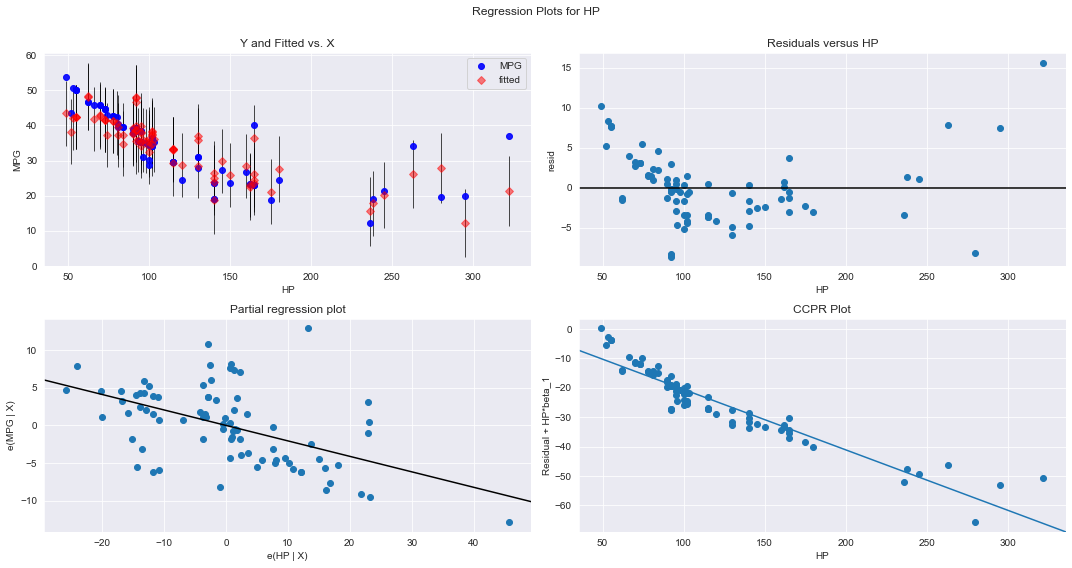

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

## Model Deletion Diagnostics

### Detecting Influencers/Outliers

#### Cook's Distance

In [28]:
model_influence = model.get_influence()
(c,p) = model_influence.cooks_distance

In [29]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

In [30]:
p

array([0.99749559, 0.999611  , 0.99986003, 0.99998609, 0.99955511,
       0.99999503, 0.9998141 , 0.99999897, 0.99999675, 0.99999995,
       0.9999985 , 0.99403955, 0.99999999, 0.99999838, 0.99999376,
       0.9999937 , 0.99999986, 0.99565009, 0.99999997, 0.99999997,
       1.        , 0.999967  , 1.        , 0.99999999, 0.99999973,
       0.99767993, 0.99996892, 1.        , 0.9994181 , 1.        ,
       0.99993697, 0.9999999 , 0.99999999, 0.99999986, 0.99999865,
       1.        , 0.99999999, 0.99999529, 0.99995016, 0.99997662,
       1.        , 1.        , 0.99999581, 0.99999583, 1.        ,
       0.99999998, 1.        , 1.        , 0.99994456, 0.99999357,
       0.99999849, 0.99999452, 1.        , 0.99995725, 0.99999993,
       1.        , 0.99992953, 0.99999327, 0.99994468, 0.99999732,
       0.99999879, 0.99995818, 0.99999979, 0.99999741, 0.9999988 ,
       0.99974271, 0.99999212, 1.        , 0.99999997, 0.99999956,
       0.94273321, 0.99999996, 1.        , 1.        , 0.99981

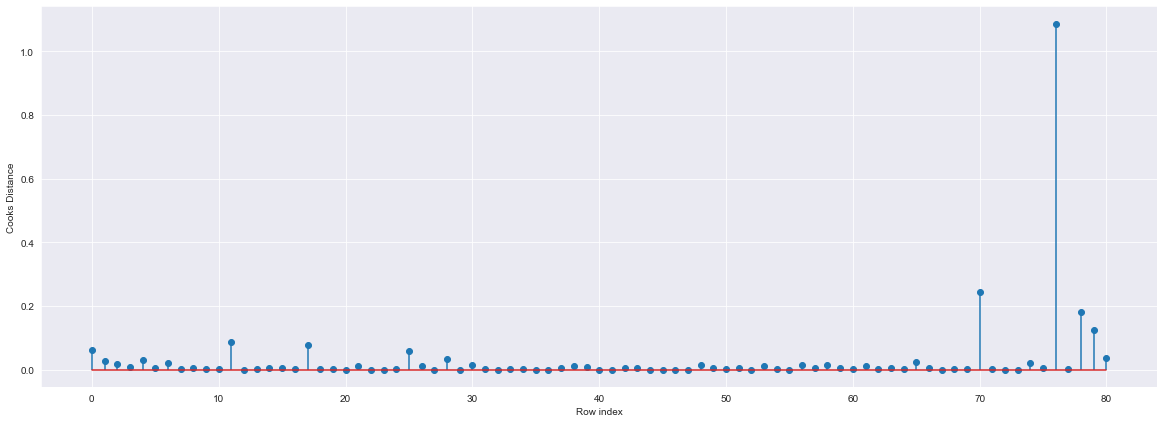

In [31]:
#Plot the influencers valuesn using the stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179823)

### High Influence Points

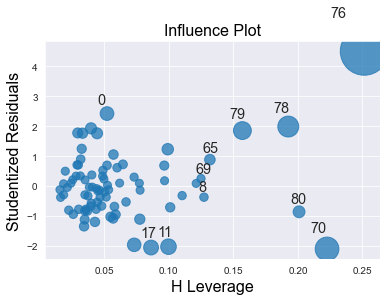

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [35]:
leverage_cutoff

0.2222222222222222

### From the above plot it is evident that data point 70 AND 76 are the influencers

In [36]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


## Improving the model

In [37]:
cars_new = pd.read_csv("/Users/chira/Downloads/cars.csv")


In [38]:
cars_new.head()
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [39]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars1 = cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [40]:
#Drop the original index
cars1=cars1.drop(['index'],axis=1)

In [41]:
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


## Build the model with the rectified data

In [42]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~SP+HP+VOL',data = cars1).fit()

In [43]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161692010376006, 446.1172263944773)

In [44]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~SP+HP+WT',data = cars1).fit()

In [45]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8160034320495305, 446.1884323575031)

###### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value as comprared to 'final_ml_W' hence the we use the subset with 'Vol' variable there by eliminating multi collinearity problem 

### Cook's Distance

In [46]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

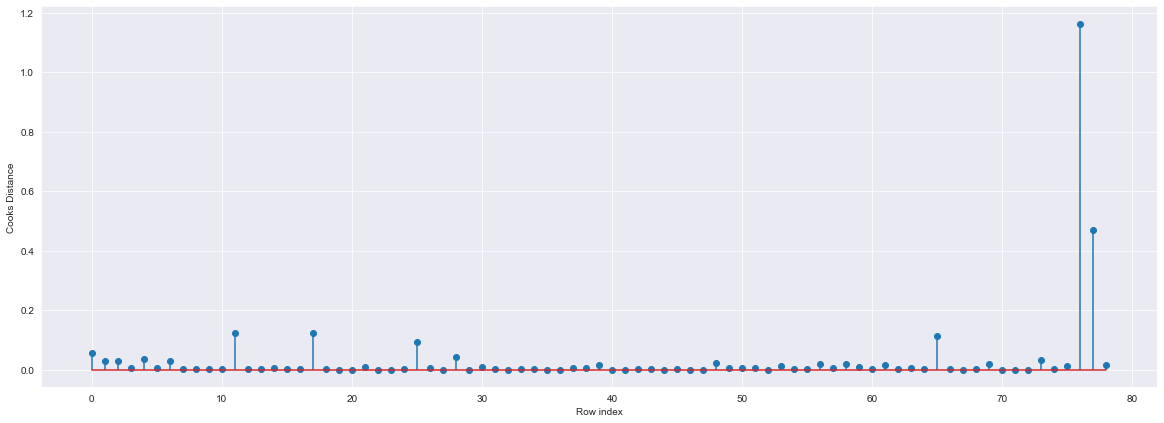

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [51]:
#Drop 76 and 77 observation
car2 = cars1.drop(cars1.index[[76,77]],axis=0)

In [52]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [53]:
#Reset the index and re arrange the row values 

car3 = car2.reset_index()

In [54]:
car4 = car3.drop(['index'],axis = 1)

In [55]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+HP+SP',data = car4).fit()

In [56]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

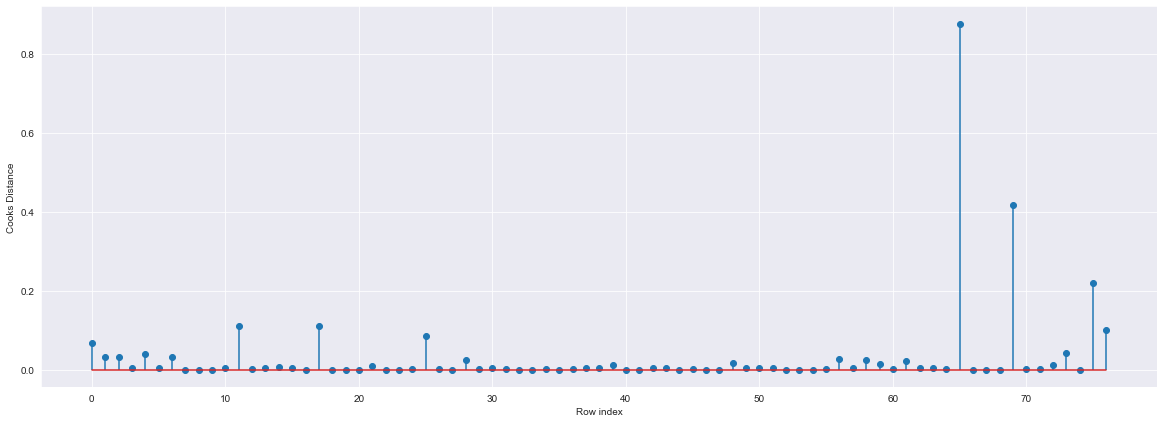

In [57]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [58]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.877455698629671)

#### Since the Cook's Distance is <1 , we can stop the diagnostic process and filnaize the model

## Predicting with new data

In [59]:
# New data fro prediction
new_data =  pd.DataFrame({'HP':41,"VOL":100,"SP":132,"WT":65},index=[1])

In [60]:
final_ml_V.predict(new_data)

1    58.096512
dtype: float64